In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from core.utils import load_file_generator
from core.parse_fichas import parse_all_fichas

In [2]:
link_indicadores = 'https://observasampa.prefeitura.sp.gov.br/_temp/DadosAbertos/ObservaSampaDadosAbertosIndicadoresCSV.csv'

In [3]:
df_indicadores = pd.read_csv(link_indicadores, sep=';')

In [4]:
df_indicadores.set_index(df_indicadores['Nome'], inplace=True)

In [5]:
df_indicadores.head()

,Nome,Região,Período,Resultado
Nome,,,,
01.01.01 Quantidade de famílias em situação de extrema pobreza (até 1/4 salário mínimo),01.01.01 Quantidade de famílias em situação de...,Água Rasa (Distrito),2015,1104
01.01.01 Quantidade de famílias em situação de extrema pobreza (até 1/4 salário mínimo),01.01.01 Quantidade de famílias em situação de...,Água Rasa (Distrito),2018,1702
01.01.01 Quantidade de famílias em situação de extrema pobreza (até 1/4 salário mínimo),01.01.01 Quantidade de famílias em situação de...,Água Rasa (Distrito),2020,1500
01.01.01 Quantidade de famílias em situação de extrema pobreza (até 1/4 salário mínimo),01.01.01 Quantidade de famílias em situação de...,Água Rasa (Distrito),2013,994
01.01.01 Quantidade de famílias em situação de extrema pobreza (até 1/4 salário mínimo),01.01.01 Quantidade de famílias em situação de...,Água Rasa (Distrito),2017,1537


In [6]:
df_fichas = parse_all_fichas()

In [7]:
df_fichas.head()

,nome_do_indicador,descricao_de_indicador,tema_(s),formula_de_calculo_(em_texto),periodicidade,unidades_territoriais,serie_historica_disponivel,fonte,original_file,sucess,informacoes_tecnicas,observacoes,interpretacao_basica
0,11.02.06 Percentual do viário da cidade com in...,Mede em porcentagem a parte do viário dedicada...,"Mobilidade e Segurança no Trânsito,ODS São Paulo",( Faixas exclusivas de ônibus implantadas (km)...,Anual,Município,Início: 2014 - atualmente,Secretaria Municipal de Mobilidade e Trânsito ...,/home/h-pgy/Desktop/Projetos/report_atualizaca...,True,NaN,NaN,NaN
1,16.07.01 Número de Consultas Públicas feitas p...,Mede a quantidade de Consultas Públicas realiz...,"Gestão Pública,ODS São Paulo",Consultas Participe +,Anual,Município,2020,Secretaria do Governo Municipal (SGM),/home/h-pgy/Desktop/Projetos/report_atualizaca...,True,Considera-se Consulta Pública a submissão de p...,NaN,NaN
2,15.01.06 Unidades de Conservação – Planos de M...,Indicador representa a proporção de unidades d...,"Meio Ambiente,ODS São Paulo",( Unidades de Conservação com plano de manejo ...,Anual,Município,Início: 2018 - atual,Secretaria Municipal do Verde e do Meio Ambien...,/home/h-pgy/Desktop/Projetos/report_atualizaca...,True,Considera as Unidades de Conservação municipai...,NaN,NaN
3,Taxa de ocorrências registradas de roubos (por...,Expressa o total de ocorrências de roubos na c...,Segurança e Violência,( Registros de roubos\n \n DIVI...,Anual,Município,Início: 2000 - atualmente,Fundação Sistema Estadual de Análise de Dados ...,/home/h-pgy/Desktop/Projetos/report_atualizaca...,True,O indicador a quantidade de ocorrências de rou...,NaN,NaN
4,03.06.08 Participação dos caminhões nos aciden...,Percentual da participação dos caminhões nos a...,"Mobilidade e Segurança no Trânsito,ODS São Paulo",( Número de caminhões envolvidos em acidentes ...,Anual,Município,2020,Companhia de Engenharia de Tráfego (CET); Secr...,/home/h-pgy/Desktop/Projetos/report_atualizaca...,True,NaN,NaN,NaN


In [8]:
df_fichas = df_fichas[df_fichas['sucess']].copy().reset_index(drop=True)

In [9]:
def find_ultima_atualizacao(nome_indi, df_indicadores):
    try:
        dados_indi = df_indicadores.loc[nome_indi]

        return dados_indi['Período'].max()
    except KeyError:
        try:
            dados_indi = df_indicadores.loc[nome_indi+' ']

            return dados_indi['Período'].max()
        except KeyError:
            return np.NaN

In [10]:
df_fichas['ultima_atualizacao'] = df_fichas['nome_do_indicador'].apply(lambda x: find_ultima_atualizacao(x, df_indicadores))

In [11]:
a = df_fichas['ultima_atualizacao'].value_counts()

<AxesSubplot:>

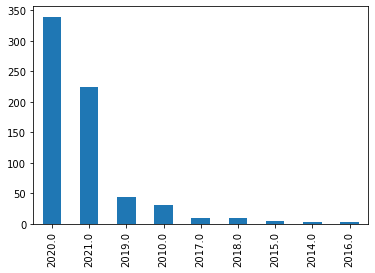

In [12]:
a.plot.bar()

In [13]:
df_fichas['periodicidade'].unique()

array(['Anual', nan, 'Mensal', 'anual', 'Decenal', 'Depende',
       'Indefinido', 'Quinquenal', 'Decenal/Anual', 'Bienal', '[]',
       'mensal', 'quinquenal', 'Varia', 'Periodicidade d', 'Periodicid'],
      dtype=object)

In [14]:
df_fichas['periodicidade'].fillna('vazio', inplace=True)

In [15]:
df_fichas['periodicidade'].unique()

array(['Anual', 'vazio', 'Mensal', 'anual', 'Decenal', 'Depende',
       'Indefinido', 'Quinquenal', 'Decenal/Anual', 'Bienal', '[]',
       'mensal', 'quinquenal', 'Varia', 'Periodicidade d', 'Periodicid'],
      dtype=object)

In [16]:
df_fichas['periodicidade'] = df_fichas['periodicidade'].str.lower()

In [17]:
df_fichas['periodicidade'].unique()

array(['anual', 'vazio', 'mensal', 'decenal', 'depende', 'indefinido',
       'quinquenal', 'decenal/anual', 'bienal', '[]', 'varia',
       'periodicidade d', 'periodicid'], dtype=object)

In [18]:
def offset_periodicidade(periodo):
    
    de_para = {
        'anual' : 1,
        'vazio' : np.NaN,
        #o limite é 1 ano, por isso mensal é 1
        'mensal' : 1,
        'decenal' : 10,
        'depende' : np.NaN,
        'indefinido' : np.NaN,
        'quinquenal' : 5,
        #vou pegar o maior, decenal
        'decenal/anual' : 10,
        'bienal' : 2,
        '[]' : np.NaN,
        'varia' : np.NaN,
        'periodicidade d' : np.NaN,
        'periodicid' : np.NaN
    }
    
    return de_para.get(periodo, np.NaN)

In [19]:
df_fichas['offset'] = df_fichas['periodicidade'].apply(offset_periodicidade)

In [20]:
df_fichas['ano_atual'] = datetime.today().year

In [21]:
df_fichas['ultimo_ano_atualizavel'] = df_fichas['ano_atual'] - df_fichas['offset']

In [22]:
df_fichas['delay_atualizacao'] = df_fichas['ultima_atualizacao'] - df_fichas['ultimo_ano_atualizavel']

In [23]:
df_fichas['atualizado']=df_fichas['delay_atualizacao']>=0

In [24]:
df_fichas['fonte'] = df_fichas['fonte'].fillna('vazio')

In [25]:
for fonte in df_fichas['fonte'].unique():
    fonte = str(fonte)
    if 'ibge' in fonte.lower():
        print(fonte)

Instituto Brasileiro de Geografia e Estatística (IBGE)
IBGE. Pesquisa Nacional por Amostra de Domicílios Contínua Anual - 5ª visita; SMDET
Instituto Brasileiro de Geografia e Estatística (IBGE); Fundação Sistema Estadual de Análise de Dados (SEADE); Secretaria Municipal de Cultura (SMC); Secretaria Municipal de Urbanismo e Licenciamento (SMUL)
Instituto Brasileiro de Geografia e Estatística (IBGE); Fundação João Pinheiro (FJP)
PNAD/IBGE; Secretaria Municipal da Fazenda (SF)
Pnad Contínua (IBGE); Secretaria Municipal da Fazenda (SF)
Censo agropecuário (IBGE)
Instituto Brasileiro e Geografia e Estatística (IBGE)
[{"cd_fonte":7,"nm_fonte":"IBGE "},{"cd_fonte":8,"nm_fonte":"Fundação SEADE"}]
Instituto Brasileiro de Geografia e Estatística (IBGE), Fundação Sistema Estadual de Análise de Dados (SEADE)
Censo Demográfico (IBGE)
Instituto Brasileiro de Geografia e Estatística (IBGE); Fundação Sistema Estadual de Análise de Dados (SEADE)
Fundação Estadual Sistema de Análise de Dados (SEADE); Ins

In [26]:
df_fichas['fonte_ibge'] = df_fichas['fonte'].str.lower().str.contains('ibge')

In [27]:
df_fichas['fonte_ibge'].sum()

31

In [28]:
df = df_fichas[df_fichas['ultima_atualizacao'].notnull()]
df = df[df['offset'].notnull()].copy().reset_index(drop=True)

In [29]:
df['atualizado'].mean()

0.3459715639810427

In [30]:
df['atualizado_txt'] = df['atualizado'].apply(lambda x: 'Sim' if x else 'Não')

In [31]:
df[~df['fonte_ibge']]['atualizado'].mean()

0.3576158940397351

In [32]:
df['fonte_ibge'].any()

True

In [33]:
len(df)

633

In [34]:
df[~df['fonte_ibge']]

,nome_do_indicador,descricao_de_indicador,tema_(s),formula_de_calculo_(em_texto),periodicidade,unidades_territoriais,serie_historica_disponivel,fonte,original_file,sucess,...,observacoes,interpretacao_basica,ultima_atualizacao,offset,ano_atual,ultimo_ano_atualizavel,delay_atualizacao,atualizado,fonte_ibge,atualizado_txt
0,11.02.06 Percentual do viário da cidade com in...,Mede em porcentagem a parte do viário dedicada...,"Mobilidade e Segurança no Trânsito,ODS São Paulo",( Faixas exclusivas de ônibus implantadas (km)...,anual,Município,Início: 2014 - atualmente,Secretaria Municipal de Mobilidade e Trânsito ...,/home/h-pgy/Desktop/Projetos/report_atualizaca...,True,...,NaN,NaN,2020.0,1.0,2022,2021.0,-1.0,False,False,Não
1,16.07.01 Número de Consultas Públicas feitas p...,Mede a quantidade de Consultas Públicas realiz...,"Gestão Pública,ODS São Paulo",Consultas Participe +,anual,Município,2020,Secretaria do Governo Municipal (SGM),/home/h-pgy/Desktop/Projetos/report_atualizaca...,True,...,NaN,NaN,2020.0,1.0,2022,2021.0,-1.0,False,False,Não
2,15.01.06 Unidades de Conservação – Planos de M...,Indicador representa a proporção de unidades d...,"Meio Ambiente,ODS São Paulo",( Unidades de Conservação com plano de manejo ...,anual,Município,Início: 2018 - atual,Secretaria Municipal do Verde e do Meio Ambien...,/home/h-pgy/Desktop/Projetos/report_atualizaca...,True,...,NaN,NaN,2020.0,1.0,2022,2021.0,-1.0,False,False,Não
3,Taxa de ocorrências registradas de roubos (por...,Expressa o total de ocorrências de roubos na c...,Segurança e Violência,( Registros de roubos\n \n DIVI...,anual,Município,Início: 2000 - atualmente,Fundação Sistema Estadual de Análise de Dados ...,/home/h-pgy/Desktop/Projetos/report_atualizaca...,True,...,NaN,NaN,2021.0,1.0,2022,2021.0,0.0,True,False,Sim
4,03.06.08 Participação dos caminhões nos aciden...,Percentual da participação dos caminhões nos a...,"Mobilidade e Segurança no Trânsito,ODS São Paulo",( Número de caminhões envolvidos em acidentes ...,anual,Município,2020,Companhia de Engenharia de Tráfego (CET); Secr...,/home/h-pgy/Desktop/Projetos/report_atualizaca...,True,...,NaN,NaN,2020.0,1.0,2022,2021.0,-1.0,False,False,Não
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,Tempo médio de atendimento para análises clíni...,Dias de intervalo entre data da coleta e data ...,"PPA 2018-2021,Saúde",Tempo médio de atendimento para análises clíni...,anual,Município,Início: 2009 - Atualmente,"Secretaria Municipal da Saúde (SMS), Sistema I...",/home/h-pgy/Desktop/Projetos/report_atualizaca...,True,...,Lei nº 14.173/06,NaN,2021.0,1.0,2022,2021.0,0.0,True,False,Sim
629,16.06.05 Nota média de eficiência da Administr...,Avalia o atendimento dos pedidos de acesso à i...,"Gestão Pública,ODS São Paulo",Total das notas em transparência passiva receb...,anual,Município,Início: 2017 - atualmente,Controladoria Geral do Município (CGM); Ouvido...,/home/h-pgy/Desktop/Projetos/report_atualizaca...,True,...,Os valores são apurados semestralmente e para ...,NaN,2021.0,1.0,2022,2021.0,0.0,True,False,Sim
630,10.07.01 Número de pessoas atendidas pelo Cent...,Quantidade de pessoas atendidas pelo CRAI - Ce...,"Direitos Humanos e Cidadania,ODS São Paulo",Pessoas atendidas pelo Centro de Referência e ...,anual,município,início: 2017 - atualmente,Secretaria Municipal de Direitos Humanos (SMDHC),/home/h-pgy/Desktop/Projetos/report_atualizaca...,True,...,NaN,NaN,2020.0,1.0,2022,2021.0,-1.0,False,False,Não
631,11.01.09 Valores empenhados por ano com atendi...,Trata-se de recursos municipais despendidos an...,"Moradia e Saneamento Básico,ODS São Paulo",Valores empenhados por ano com atendimento hab...,anual,Município,Início: 2015 - Atualmente,Departamento de Administração e Finanças – DIF...,/home/h-pgy/Desktop/Projetos/report_atualizaca...,True,...,NaN,NaN,2020.0,1.0,2022,2021.0,-1.0,False,False,Não


In [35]:
df['delay_atualizacao'].mean()

-0.9510268562401264

<AxesSubplot:ylabel='Frequency'>

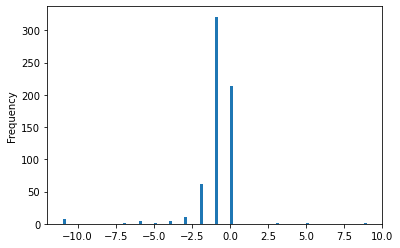

In [36]:
df['delay_atualizacao'].plot.hist(bins=100)

In [37]:
df.keys()

Index(['nome_do_indicador', 'descricao_de_indicador', 'tema_(s)',
       'formula_de_calculo_(em_texto)', 'periodicidade',
       'unidades_territoriais', 'serie_historica_disponivel', 'fonte',
       'original_file', 'sucess', 'informacoes_tecnicas', 'observacoes',
       'interpretacao_basica', 'ultima_atualizacao', 'offset', 'ano_atual',
       'ultimo_ano_atualizavel', 'delay_atualizacao', 'atualizado',
       'fonte_ibge', 'atualizado_txt'],
      dtype='object')

In [38]:
cols = ['nome_do_indicador', 
        'tema_(s)', 
        'periodicidade', 
        'fonte', 
        'fonte_ibge',
        'ultima_atualizacao', 
        'offset', 
        'ano_atual',
        'atualizado',
        'atualizado_txt', 
        'ultimo_ano_atualizavel',
       'delay_atualizacao']

In [39]:
final = df[cols]

In [41]:
final.to_csv('relatorio_atualizacao_final.csv', encoding='utf-8', sep=';')